# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [ ]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import geopandas as gpd
import pyproj
import cartopy
import matplotlib.pyplot as plt
import numpy as np

# Import API key
from api_keys_geoapi import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,vilyuchinsk,52.9306,158.4028,25.15,61,55,6.86,RU,1690167144
1,1,calama,-22.4667,-68.9333,12.42,19,22,3.28,CL,1690166894
2,2,zalingei,12.9096,23.4741,23.84,65,9,0.66,SD,1690167144
3,3,gadzhiyevo,69.2551,33.3362,9.31,95,100,6.20,RU,1690167145
4,4,novyy urengoy,66.0833,76.6333,23.51,53,19,1.37,RU,1690166878


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

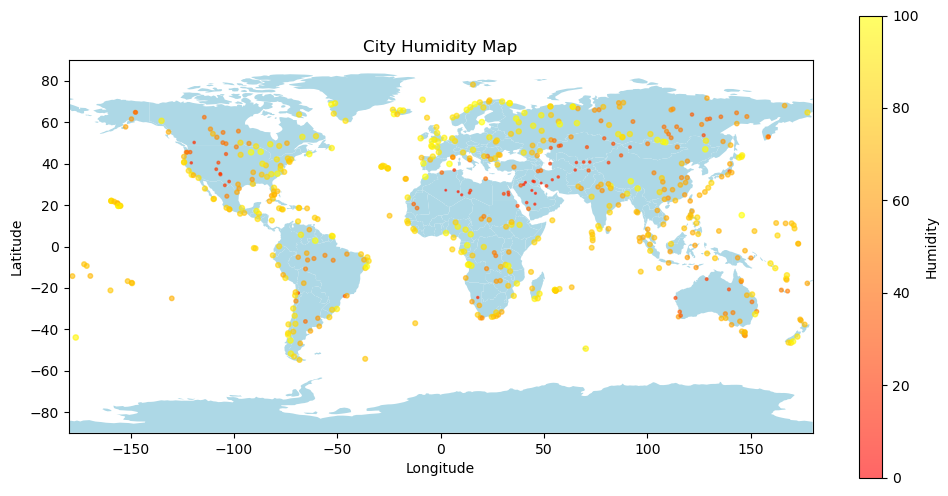

In [3]:
%%capture --no-display


# Configure the map plot
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightblue", ax=ax)

# Plotting our Humidity data with a color map
x = city_data_df['Lng']
y = city_data_df['Lat']
z = city_data_df['Humidity']
plt.scatter(x, y, s=.15*z, c=z, alpha=0.6, vmin=0,
            cmap='autumn')
plt.colorbar(label='Humidity')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("City Humidity Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [4]:
# Narrow down cities that fit criteria and drop any results with null values

# Filtering Cities where temperature in with the range of 15 to 25 degree celsius and Cloudiness = 0 
city_filter_data_df = city_data_df.loc[(city_data_df["Cloudiness"] == 0) & (
    city_data_df["Max Temp"] <= 25) &(
    city_data_df["Max Temp"] >= 15), :].reset_index(drop=True) 


# Drop any rows with null values
# Checked there is no Null Values in the data frame

# Display sample data
city_filter_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,22,sliven,42.6858,26.3292,18.20,83,0,0.53,BG,1690167151
1,36,bethel,41.3712,-73.4140,24.81,76,0,0.00,US,1690167140
2,42,hamilton,39.1834,-84.5333,22.47,81,0,3.60,US,1690167106
3,45,luau,-10.7073,22.2247,15.13,52,0,1.66,AO,1690167118
4,89,tsiombe,-25.3000,45.4833,16.60,95,0,2.49,MG,1690167175
5,96,constantia,44.1833,28.6500,17.61,70,0,3.12,RO,1690166923
6,114,collie,-33.3667,116.1500,16.96,36,0,4.67,AU,1690167183
7,119,palmer,42.1584,-72.3287,21.39,81,0,0.00,US,1690167184
8,163,abha,18.2164,42.5053,20.90,42,0,0.00,SA,1690167201
9,195,quelimane,-17.8786,36.8883,16.97,93,0,0.51,MZ,1690167191


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE
hotel_df = city_filter_data_df[["City","Country","Lat","Lng","Humidity"]]
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

hotel_df["Hotel Name"] = ' '
# Display sample data
# YOUR CODE HERE
hotel_df

C:\Users\RMaji\AppData\Local\Temp\ipykernel_35808\2868421138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["Hotel Name"] = ' '


,City,Country,Lat,Lng,Humidity,Hotel Name
0,sliven,BG,42.6858,26.3292,83,
1,bethel,US,41.3712,-73.4140,76,
2,hamilton,US,39.1834,-84.5333,81,
3,luau,AO,-10.7073,22.2247,52,
4,tsiombe,MG,-25.3000,45.4833,95,
5,constantia,RO,44.1833,28.6500,70,
6,collie,AU,-33.3667,116.1500,36,
7,palmer,US,42.1584,-72.3287,81,
8,abha,SA,18.2164,42.5053,42,
9,quelimane,MZ,-17.8786,36.8883,93,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
import json
from requests.structures import CaseInsensitiveDict
radius = "10000"
api_key = geoapify_key

hotel_df['Lng'] = hotel_df['Lng'].astype(str)
hotel_df['Lat'] = hotel_df['Lat'].astype(str)


params = {
    'apiKey' : api_key ,
    'filter' : '',
    'bias' : '',
    'categories' : 'accommodation.hotel',
    'lang' : 'en',
    'limit' : 1
    
}

headers = CaseInsensitiveDict()
headers["Accept"] = "application/json"

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE
    hotel_lng = row["Lng"]
    hotel_lat = row["Lat"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = 'circle:' + hotel_lng + ',' + hotel_lat + ',' + radius
    params["bias"] = 'proximity:' + hotel_lng +',' + hotel_lat
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"


    # Make and API request using the params dictionaty
    name_address_req = requests.get(base_url, headers=headers,params=params)
    
    # Convert the API response to JSON format
    name_address = name_address_req.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try: 
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

C:\Users\RMaji\AppData\Local\Temp\ipykernel_35808\1067206672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['Lng'] = hotel_df['Lng'].astype(str)
C:\Users\RMaji\AppData\Local\Temp\ipykernel_35808\1067206672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['Lat'] = hotel_df['Lat'].astype(str)


Starting hotel search
sliven - nearest hotel: Атлантик
bethel - nearest hotel: Hampton Inn Danbury
hamilton - nearest hotel: North Vista Manor
luau - nearest hotel: No hotel found
tsiombe - nearest hotel: No hotel found
constantia - nearest hotel: Hotel Chérica
collie - nearest hotel: Federal Hotel
palmer - nearest hotel: No hotel found
abha - nearest hotel: SAHAB
quelimane - nearest hotel: Mabassa
sona - nearest hotel: Al Bosco
kodiak - nearest hotel: Shelikof Lodge
pazardzhik - nearest hotel: Хотел "Примавера 2"
linxia chengguanzhen - nearest hotel: 如家酒店
tolanaro - nearest hotel: Hôtel Mahavokey
belogradchik - nearest hotel: Dalia
kamyzyak - nearest hotel: No hotel found
dryden - nearest hotel: Holiday Inn Express
capinota - nearest hotel: No hotel found
guayaramerin - nearest hotel: Hotel K d' Oro
rice lake - nearest hotel: Paul Bunyan Resort
carnarvon - nearest hotel: No hotel found
gorodishche - nearest hotel: Отель "София"
castel di sangro - nearest hotel: Sport Village Hotel
mou

,City,Country,Lat,Lng,Humidity,Hotel Name
0,sliven,BG,42.6858,26.3292,83,Атлантик
1,bethel,US,41.3712,-73.414,76,Hampton Inn Danbury
2,hamilton,US,39.1834,-84.5333,81,North Vista Manor
3,luau,AO,-10.7073,22.2247,52,No hotel found
4,tsiombe,MG,-25.3,45.4833,95,No hotel found
5,constantia,RO,44.1833,28.65,70,Hotel Chérica
6,collie,AU,-33.3667,116.15,36,Federal Hotel
7,palmer,US,42.1584,-72.3287,81,No hotel found
8,abha,SA,18.2164,42.5053,42,SAHAB
9,quelimane,MZ,-17.8786,36.8883,93,Mabassa


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [14]:
# Filtering out No Hotel Found rows

hotel_filter_df = hotel_df.loc[hotel_df["Hotel Name"] != "No hotel found", :]

# Converting Latitude and longitude to Float data types from String. This is required for next plotting. 

hotel_filter_df["Lat"] = hotel_filter_df["Lat"].astype('float')
hotel_filter_df["Lng"] = hotel_filter_df["Lng"].astype('float')

hotel_filter_df.dtypes

C:\Users\RMaji\AppData\Local\Temp\ipykernel_35808\2714815306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_filter_df["Lat"] = hotel_filter_df["Lat"].astype('float')
C:\Users\RMaji\AppData\Local\Temp\ipykernel_35808\2714815306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_filter_df["Lng"] = hotel_filter_df["Lng"].astype('float')


City           object
Country        object
Lat           float64
Lng           float64
Humidity        int64
Hotel Name     object
dtype: object

In [33]:

#%%capture --no-display

# Configure the map plot
hotel_plot = hotel_filter_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = True,
    frame_width = 800,
    frame_height = 700,
    size = "Humidity",
    alpha=.75,
    hover_cols=["Hotel Name", "Country"],
    xlabel="Longitude",
    ylabel="Latitude",
    legend=False,
    color = "City"
    
)

# Display the map
hotel_plot



:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)